# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import xgboost

In [2]:
!pip install shap==0.44.1
import shap
print("SHAP version:", shap.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 13.6 MB/s eta 0:00:00
SHAP version: 0.44.1


# Reading the DataSet

In [3]:
churn= pd.read_csv('/content/Churn_Modelling 2018.csv')

# Data Understanding

The Df has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [ ]:
# Dimension of the dataset
churn.shape

(10000, 14)

In [ ]:
churn.size

140000

In [ ]:
# Describe all numerical columns
churn.describe(exclude= ['O'])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


So we moslty have categorical variables

In [ ]:
# Describe all categorical columns
churn.describe(include = ['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Column Name Formatting

In [4]:
churn.columns=churn.columns.str.strip()

In [5]:
churn.columns=churn.columns.str.lower()

In [ ]:
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

## Matplotlib Visualization

<Axes: xlabel='exited', ylabel='count'>

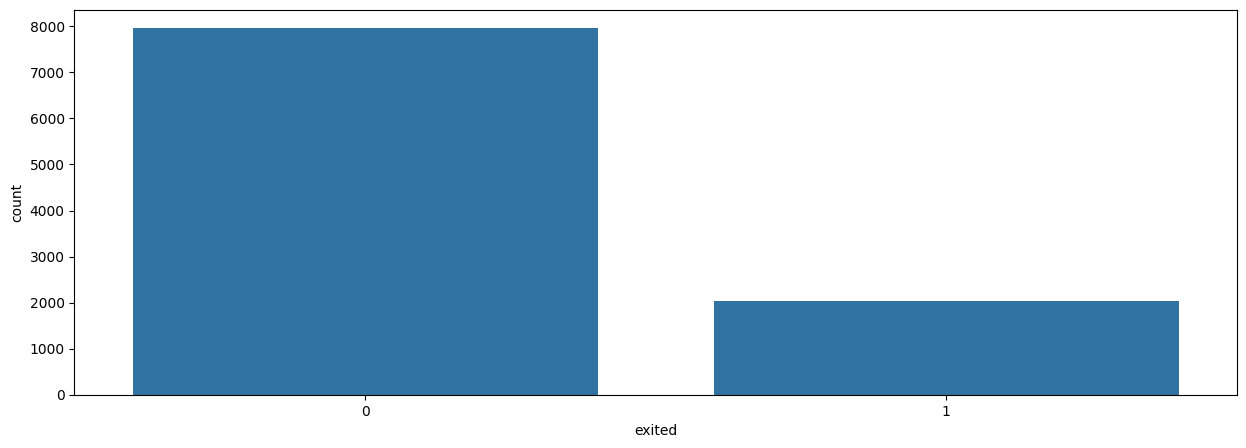

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn,x='exited')

7963
2037


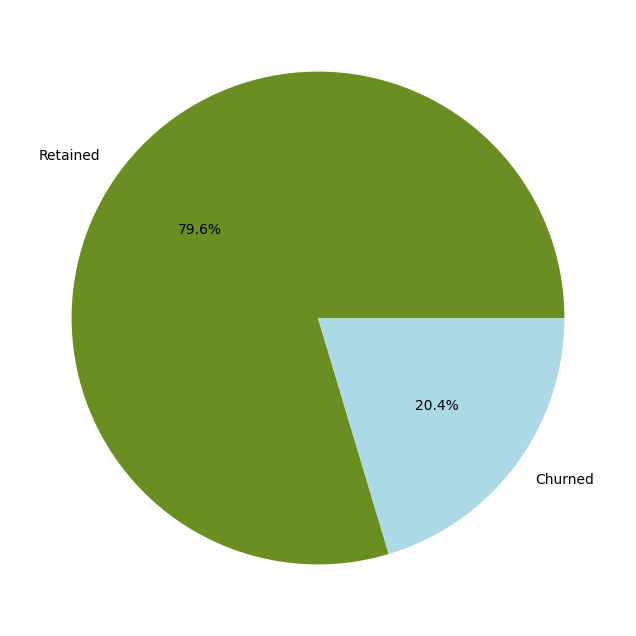

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
print(churn[(churn["exited"]==0)].count()[0])
print(churn[(churn["exited"]==1)].count()[1])

ax.pie([7963,2037], labels=["Retained","Churned"], autopct='%1.1f%%',colors=['olivedrab','lightblue'])
plt.show()


From a business perspective, the pie chart visually communicates the breakdown of customer retention versus churn within the dataset. While a 79.6% retention rate may seem positive, the 20.4% churn rate could be concerning in the bank.

However, models trained on imbalanced data may tend to favor the majority class—in this case, the 'Retained' class. This can result in a high accuracy score simply because the model predicts 'Retained' most of the time, which might not be informative about the model's ability to correctly identify churned customers.

When dealing with imbalanced classes, accuracy is not always the best metric to evaluate model performance because it can be misleading.

Therefore, other metrics such as Precision, Recall (Sensitivity), F1 Score, and the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) are often more useful for evaluating model performance in the context of imbalanced data.

In many business scenarios, the cost of false negatives (predicting a customer will not churn when they actually do) can be much higher than false positives. This is because losing an existing customer may have a greater negative impact than the cost of incorrectly targeting a customer for retention efforts. It is crucial to identify the correct balance between sensitivity and specificity to tailor the model to business needs.

<Axes: xlabel='isactivemember', ylabel='count'>

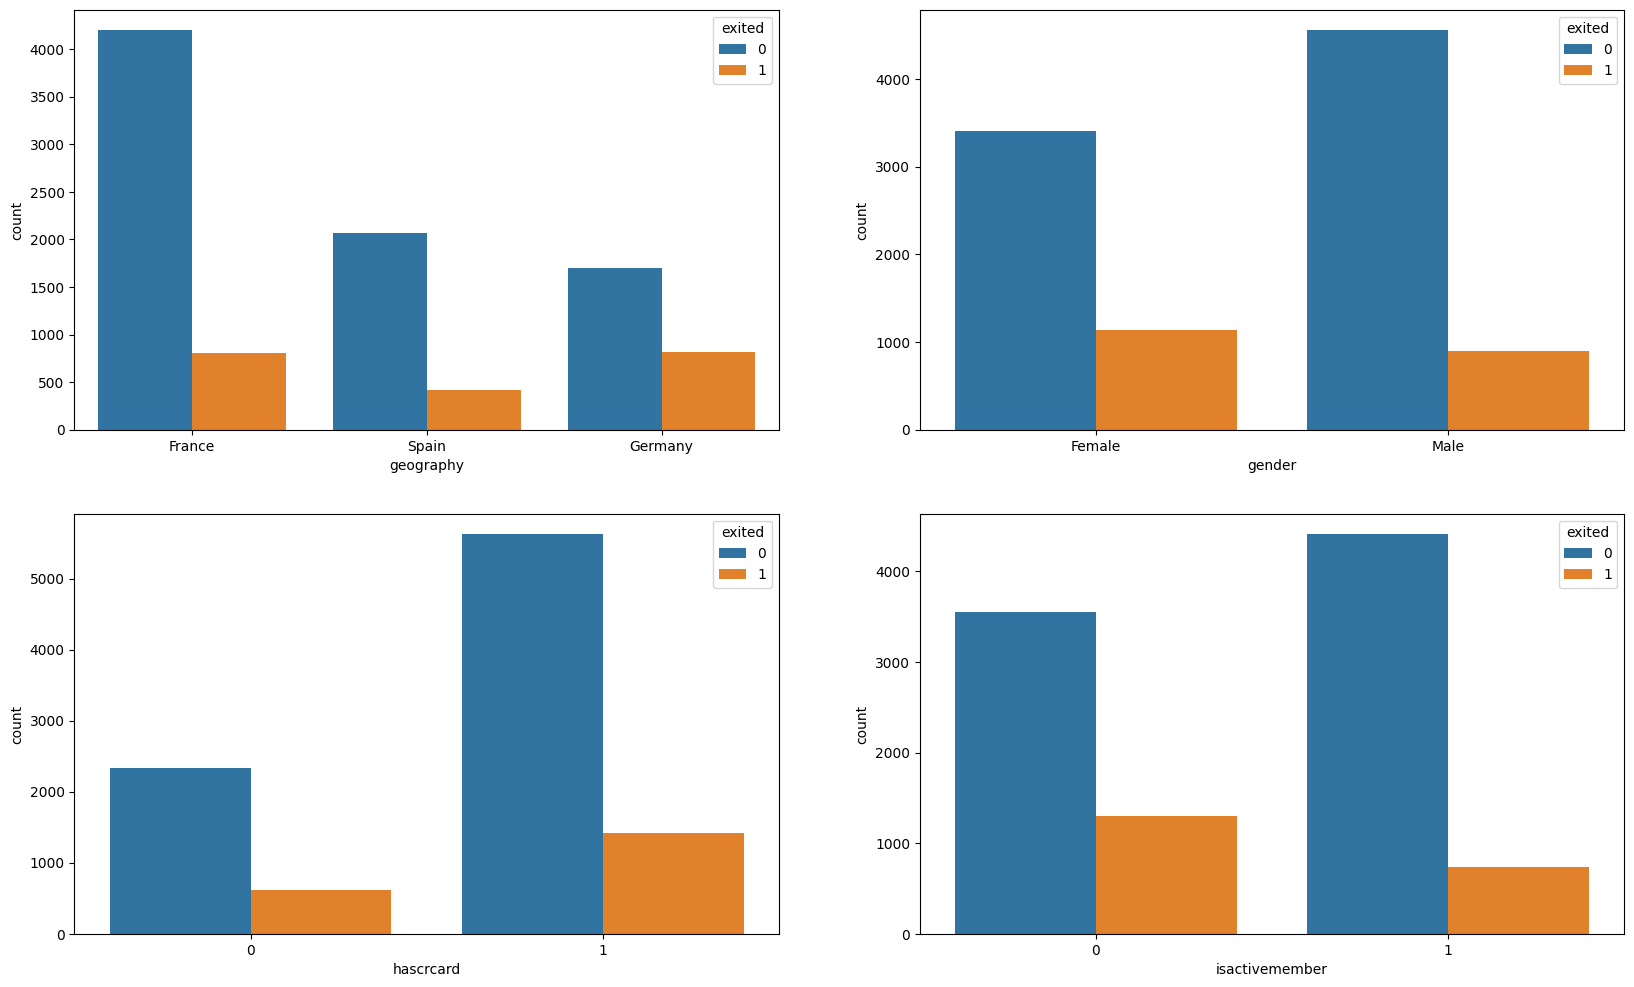

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = churn, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = churn, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = churn, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = churn, ax=axarr[1][1])

Geography:

France has the highest number of customers who have not exited (blue bar), indicating good retention. However, it also has a considerable number of customers who have exited (orange bar), though less in proportion compared to Germany. Spain has fewer customers in both categories compared to France, but the proportion of those who have exited seems lower than in Germany. Germany has the highest proportion of customers who have exited compared to those who have not, suggesting a higher churn rate.

Gender:

The number of exited customers is slightly higher for females than for males, indicating a possibly higher churn rate among female customers.

Has Credit Card (hascrcard):

The majority of customers, whether they have exited or not, possess a credit card. This suggests having a credit card is not a distinguishing feature in terms of churn. There is no significant difference in churn rate between those who have a credit card and those who do not, as indicated by the similar proportions of exited customers in both groups.

Is Active Member (isactivemember):

Active members show a much higher retention rate, with a significantly higher number of non-exited customers. Non-active members have a higher churn rate, as indicated by a larger proportion of exited customers, suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

These insights can inform targeted customer retention strategies. For example, the bank may focus on increasing customer engagement and activity levels to reduce churn, or they may investigate the higher churn rate in Germany to address any underlying issues specific to that market.

<Axes: xlabel='exited', ylabel='estimatedsalary'>

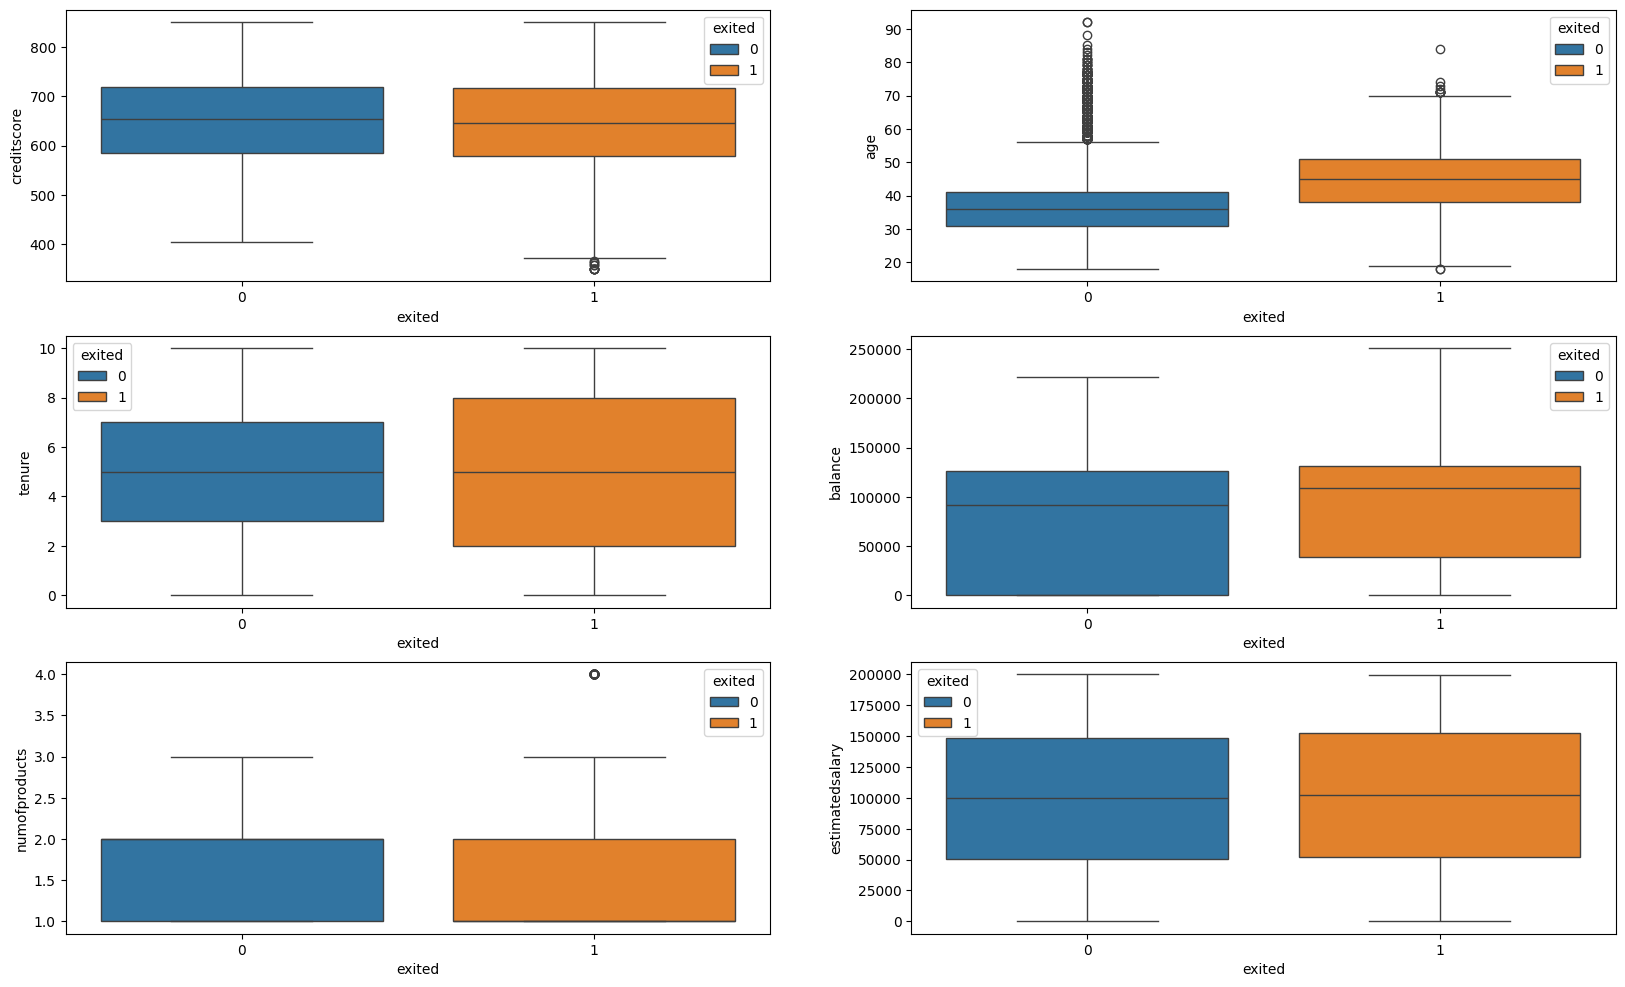

In [ ]:
#Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = churn, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = churn, ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = churn, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = churn, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = churn, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = churn, ax=axarr[2][1])

Age and Balance stand out as potential predictors of churn, as there are noticeable differences in their distributions between the churned and retained customers.

Credit Score, Tenure, and Estimated Salary seem to have less of an impact on churn, as their distributions are similar for both groups. Number of Products could also be an interesting factor to explore further since customers with more products tend to churn more.

These visual insights can help the bank prioritize factors to consider in churn prediction models and potentially tailor customer retention strategies to address the higher churn risk among older customers and those with higher balances or more products.

# Data Preprocessing

## Missing Values

In [ ]:
# Check columns list and missing values
churn.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

There are no missing values!

## Duplicate Records Handling

In [6]:
churn[churn.duplicated(subset=['customerid'],keep=False)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [ ]:
churn.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the above, we will not require the attributes like 'rownumber', 'customerid' and 'surname' as they are specific to a customer. They don't provide any useful information for the model to predict if the customer stays or leaves the bank So, we exclude them from the data frame.

In [7]:
churn=churn.drop(['rownumber','customerid','surname'],axis=1)

## Category Encoding

In [8]:
df_encoded = churn.select_dtypes(include='object')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in df_encoded:
    churn[feature] = le.fit_transform(churn[feature])

In [ ]:
churn.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Get unique count for each variable
churn.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

## Improving Model Performance with Class Imbalance Mitigation Strategies

In [9]:
churn['exited'].value_counts().to_frame()

,count
exited,
0,7963
1,2037


In [10]:
churn_majority=churn[churn['exited']==0]
churn_minority=churn[churn['exited']==1]

In [11]:
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)

In [12]:
churn_df=pd.concat([churn_majority_downsample,churn_minority])

In [13]:
churn_df['exited'].value_counts().to_frame()

,count
exited,
0,2037
1,2037


<Axes: xlabel='exited', ylabel='count'>

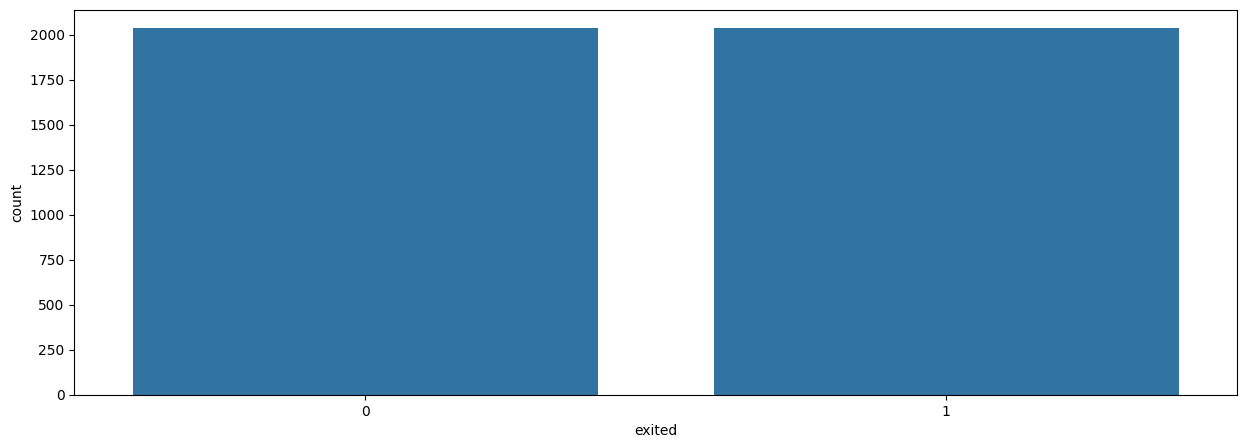

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn_df,x='exited')

In [ ]:
churn_df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [ ]:
# Get unique count for each variable
churn.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

# Multi and Bivariate Analysis

In [ ]:
churn_df.corr()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,0.010139,-0.017061,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
geography,0.010139,1.000000,-0.008165,0.008427,0.007974,0.088393,0.007397,-0.006031,-0.004315,-0.003899,0.055035
gender,-0.017061,-0.008165,1.000000,-0.056949,0.010871,-0.005457,-0.026296,-0.000795,0.020992,-0.022966,-0.141422
age,-0.019635,0.008427,-0.056949,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
tenure,0.019156,0.007974,0.010871,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
balance,0.022088,0.088393,-0.005457,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
numofproducts,0.007916,0.007397,-0.026296,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
hascrcard,0.002756,-0.006031,-0.000795,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
isactivemember,0.012992,-0.004315,0.020992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
estimatedsalary,-0.010973,-0.003899,-0.022966,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173


<Axes: >

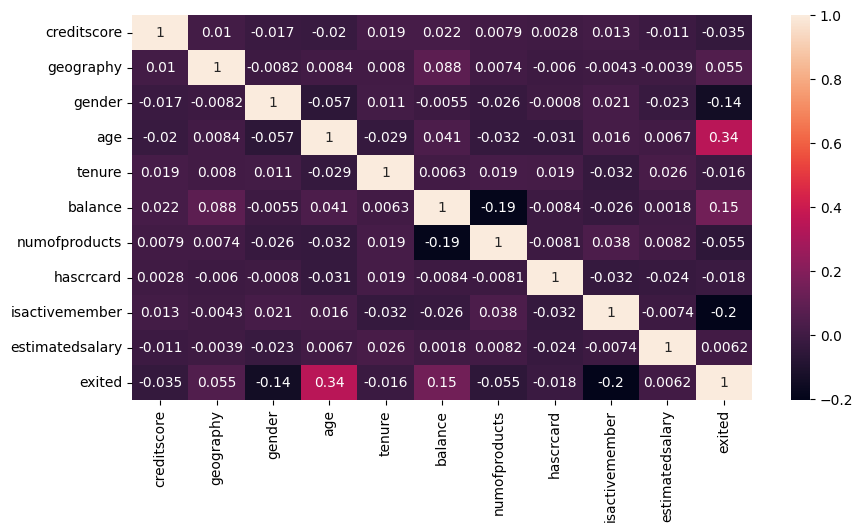

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(churn_df.corr(),annot=True)

Positive Correlations: There is a relatively strong positive correlation (0.34) between age and exited, which might suggest that older customers are more likely to churn. Similarly, balance and exited have a correlation of 0.15, suggesting that customers with higher balances might be more prone to churn, although this correlation is weaker.

Negative Correlations: The cells with a darker blue color indicate a stronger negative correlation. For example, gender and exited have a negative correlation (-0.14), which might suggest that men (=1) is less likely to churn than women (=0).

Weak/No Correlations: The cells with a color closer to white indicate very weak or no linear correlation. For instance, creditscore and exited have a correlation of -0.035, which is very close to 0, suggesting that there is no strong linear relationship between credit score and the likelihood of churn.

In [14]:
df_corr_exit=churn_df.corr()['exited'].to_frame()

<Axes: xlabel='None', ylabel='exited'>

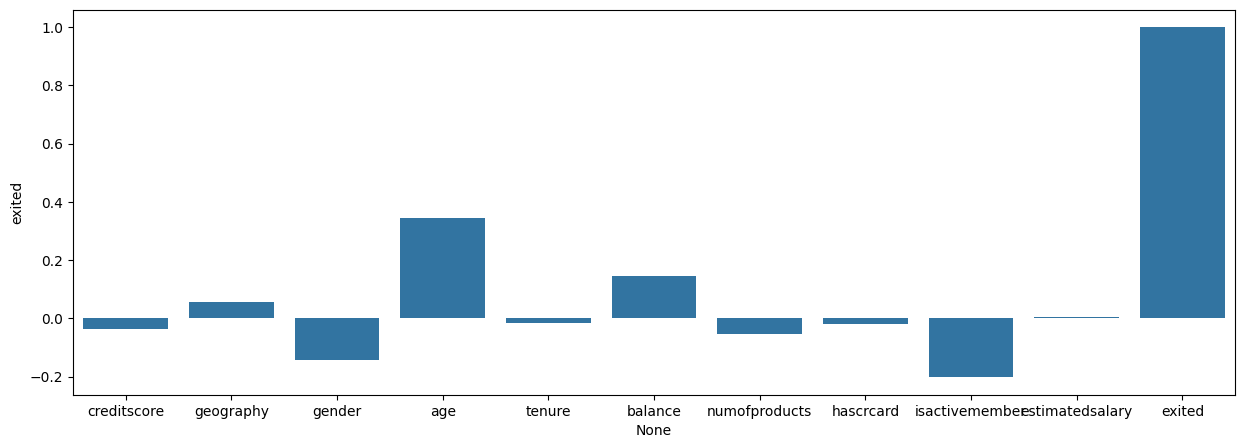

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='exited')

'Age' has the highest positive correlation with 'Exited'. This suggests that as the age increases, the likelihood of a customer exiting (churning) also increases.

'IsActiveMember' has the highest negative correlation with 'Exited'. This indicates that active members are less likely to churn.

The other features have relatively lower correlations with the target variable, with some like 'RowNumber' and 'CustomerId' having very little to no correlation.

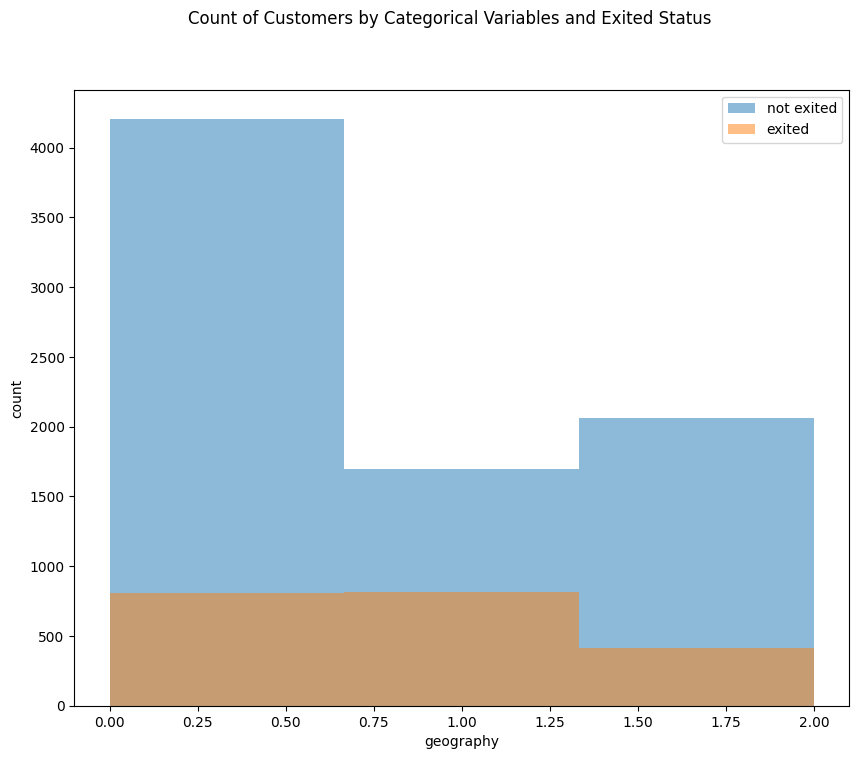

In [ ]:
fig,axarr=plt.subplots(1,1, figsize=(10,8))
axarr.hist(churn[churn['exited']==0]['geography'],bins=3,alpha=0.5,label='not exited')
axarr.hist(churn[churn['exited']==1]['geography'],bins=3,alpha=0.5,label='exited')
axarr.set_xlabel('geography')
axarr.set_ylabel('count')
axarr.legend()
fig.suptitle("Count of Customers by Categorical Variables and Exited Status")
plt.show()


Germany appears to have a higher churn rate compared to France and Spain, as indicated by the relatively higher proportion of customers who have exited.France has the largest number of customers who have remained with the bank (not exited), suggesting a stronger customer retention in that country.

<Axes: xlabel='estimatedsalary', ylabel='Density'>

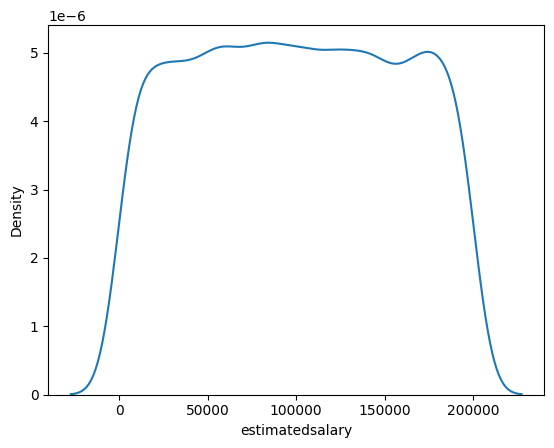

In [ ]:
# Kernel density estimation plot for estimatedsalary
sns.kdeplot(churn.estimatedsalary)

The KDE plot suggests that the 'EstimatedSalary' is uniformly distributed across the range of values. This is indicated by the relatively flat top of the density curve, which spans a broad range of salary values.

The range of 'EstimatedSalary' extends from near 0 to around 200,000, with no significant spikes or dips, which reinforces the notion of a uniform distribution.

# Create the Models

## Creating Train/Test Split

In [15]:
x=churn_df.drop(['exited'],axis=1)
y=churn_df['exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [17]:
from re import X
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3259, 10), (815, 10), (3259,), (815,))

## Scalling the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Model 1: Logistic Regression

In [19]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test_scaled)

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

def evaluate_model(y_test, y_pred):
    print("=================================")
    print("--- Confusion Matrix ---")
    print(confusion_matrix(y_test, y_pred))
    print("=================================")
    print("--- f1 score ---")
    print(f1_score(y_test, y_pred))
    print("=================================")
    print("--- Precision score ---")
    print(precision_score(y_test, y_pred))
    print("=================================")
    print("--- Recall Score ---")
    print(recall_score(y_test, y_pred))
    print("=================================")
    print("--- Accuracy Score ---")
    print(accuracy_score(y_test, y_pred))
    print("=================================")
    print("--- Classification Report ---")
    print(classification_report(y_test, y_pred))
    print("=================================")

In [22]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[308 135]
 [116 256]]
--- f1 score ---
0.671035386631717
--- Precision score ---
0.6547314578005116
--- Recall Score ---
0.6881720430107527
--- Accuracy Score ---
0.6920245398773006
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       443
           1       0.65      0.69      0.67       372

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815



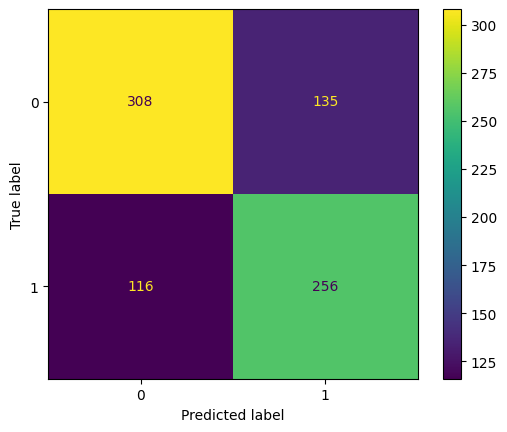

In [22]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
# Define the parameter grid
C = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1]
paramlr = dict(C=C)

# Create a StratifiedKFold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=paramlr, cv=stratified_k_fold, verbose=2)
Grid_lr.fit(X_train_scaled, y_train)
LR = Grid_lr.best_estimator_
LR.fit(X_train_scaled, y_train)

# Retrieve the best estimator
Grid_lr = Grid_lr.best_estimator_
print("Best Estimator:",Grid_lr)


# Fit the best estimator on the entire training data
Grid_lr.fit(X_train_scaled, y_train)


train_predictions = Grid_lr.predict(X_train_scaled)
test_predictions = Grid_lr.predict(X_test_scaled)


# Calculate performance metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo'))

# Print train performance
print_metrics(y_train, train_predictions, "Train")

# Print test performance
print_metrics(y_test, test_predictions, "Test")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.4; total time=   0.0s
[CV] END ........................................

In [32]:
C = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1]
paramlr = dict(C=C)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=paramlr, cv=stratified_k_fold, verbose=2)
Grid_lr.fit(X_train_scaled, y_train)

LR = Grid_lr.best_estimator_
LR.fit(X_train_scaled, y_train)

best_index = Grid_lr.best_index_
best_mean_validation_score = Grid_lr.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.4; total time=   0.0s
[CV] END ........................................

## Baseline Model 2: Desicion Tree

In [23]:
DTC=DecisionTreeClassifier(random_state=42)
DTC.fit(X_train_scaled, y_train)
depth = DTC.tree_.max_depth
print("Depth of the decision tree:", depth)
n_leaves = DTC.get_n_leaves()
print("Number of leaves in the decision tree:", n_leaves)
y_pred = DTC.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("ROC AUC score on the training data:",accuracy)

Depth of the decision tree: 21
Number of leaves in the decision tree: 629
ROC AUC score on the training data: 0.6871165644171779


In [24]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[319 124]
 [131 241]]
--- f1 score ---
0.6540027137042063
--- Precision score ---
0.6602739726027397
--- Recall Score ---
0.6478494623655914
--- Accuracy Score ---
0.6871165644171779
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       443
           1       0.66      0.65      0.65       372

    accuracy                           0.69       815
   macro avg       0.68      0.68      0.68       815
weighted avg       0.69      0.69      0.69       815



In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
max_depth = [5, 10, 15, 20, 25, 30, 40, 50, None]
max_leaf_nodes = [100, 200, 300, 400, 450, 500, 1000, None]
parameters = dict(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Grid_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=parameters, cv=stratified_k_fold)
Grid_DT.fit(X_train_scaled, y_train)
Best_DT = Grid_DT.best_estimator_
print("Best Estimator:",Best_DT)

Best_DT.fit(X_train_scaled, y_train)

train_predictions = Best_DT.predict(X_train_scaled)
test_predictions = Best_DT.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_predi, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_predi))
    print("Precision:", precision_score(y_true, y_predi, average='weighted'))
    print("Recall:", recall_score(y_true, y_predi, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_predi, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_predi, average='weighted', multi_class='ovo'))

print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")

Best Estimator: DecisionTreeClassifier(max_depth=15, max_leaf_nodes=100, random_state=42)
Train Performance:
Accuracy: 0.8462718625345198
Precision: 0.8464249671538805
Recall: 0.8462718625345198
F1 Score: 0.8462008247053681
ROC AUC Score: 0.845911281419437
Test Performance:
Accuracy: 0.7533742331288343
Precision: 0.7538202513836018
Recall: 0.7533742331288343
F1 Score: 0.7535416069960001
ROC AUC Score: 0.752242166071992


In [31]:
best_index = Grid_DT.best_index_
best_mean_validation_score = Grid_DT.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.75268770084721


## Baseline Model 3: Random Forest

In [27]:
RFC=RandomForestClassifier(random_state=42)
RFC=RFC.fit(X_train_scaled,y_train)


In [28]:
y_pred = RFC.predict(X_test_scaled)

In [29]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[356  87]
 [110 262]]
--- f1 score ---
0.7267683772538142
--- Precision score ---
0.7507163323782235
--- Recall Score ---
0.7043010752688172
--- Accuracy Score ---
0.758282208588957
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       443
           1       0.75      0.70      0.73       372

    accuracy                           0.76       815
   macro avg       0.76      0.75      0.76       815
weighted avg       0.76      0.76      0.76       815



In [29]:


max_depth = [5, 10, 15, 20, 25, 30, 40, 50, None]
n_estimators = [10, 100, 500, 700, 1000]
parameters = dict(max_depth=max_depth, n_estimators=n_estimators)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=parameters, verbose=2, cv=stratified_k_fold)

Grid_RF.fit(X_train_scaled, y_train)

Best_RF = Grid_RF.best_estimator_
print("Best Estimator:", Best_RF)

# Fit the best estimator on the entire training data
Best_RF.fit(X_train_scaled, y_train)


train_predictions = Best_RF.predict(X_train_scaled)
test_predictions = Best_RF.predict(X_test_scaled)


def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo'))


print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=500; total time=   3.0s
[CV] END ......................max_depth=5, n_e

In [30]:
best_index = Grid_RF.best_index_
best_mean_validation_score = Grid_RF.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.7704875934145676


## Baseline Model 4: KNN

In [48]:
knn=KNeighborsClassifier(n_neighbors=3)

In [49]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred=lr.predict(X_test_scaled)

In [51]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[308 135]
 [116 256]]
--- f1 score ---
0.671035386631717
--- Precision score ---
0.6547314578005116
--- Recall Score ---
0.6881720430107527
--- Accuracy Score ---
0.6920245398773006
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       443
           1       0.65      0.69      0.67       372

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815



In [52]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=stratified_k_fold, verbose=2)

Grid_KNN.fit(X_train_scaled, y_train)

Best_KNN = Grid_KNN.best_estimator_
print("Best Estimator:", Best_KNN)

Best_KNN.fit(X_train_scaled, y_train)

train_predictions = Best_KNN.predict(X_train_scaled)
test_predictions = Best_KNN.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_pred, churn):
    print(f"{churn} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo'))

print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=5, we

In [53]:
best_index = Grid_KNN.best_index_
best_mean_validation_score = Grid_KNN.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.7302922356355961


## Baseline Model 5: SVM

In [34]:
svc=SVC()

In [35]:
svc.fit(X_train_scaled,y_train)

SVC()

In [36]:
y_pred = svc.predict(X_test_scaled)

In [37]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[349  94]
 [103 269]]
--- f1 score ---
0.7319727891156462
--- Precision score ---
0.7410468319559229
--- Recall Score ---
0.7231182795698925
--- Accuracy Score ---
0.758282208588957
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       443
           1       0.74      0.72      0.73       372

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



In [39]:

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a StratifiedKFold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_SVM = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=stratified_k_fold, verbose=2)

Grid_SVM.fit(X_train_scaled, y_train)

# Retrieve the best estimator
Best_SVM = Grid_SVM.best_estimator_
print("Best Estimator:", Best_SVM)

# Fit the best estimator on the entire training data
Best_SVM.fit(X_train_scaled, y_train)


train_predictions = Best_SVM.predict(X_train_scaled)

test_predictions = Best_SVM.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_pred, churn):
    print(f"{churn} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    #print("ROC AUC Score:", roc_auc_score(y_true, Best_SVM.predict_proba(X_test_scaled)[:, 1]))

print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.9s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.2s
[CV] END .....................C=0.1, gamma=scal

In [40]:
best_index = Grid_SVM.best_index_
best_mean_validation_score = Grid_SVM.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.7634286091242354


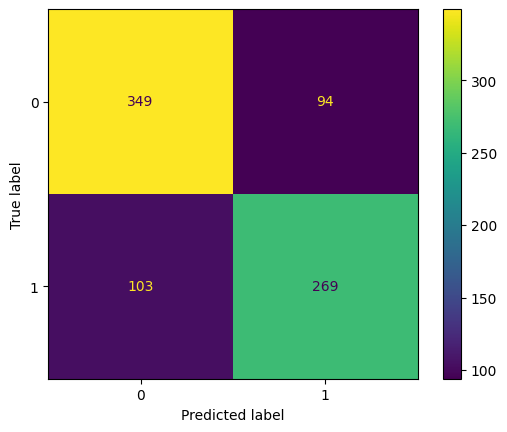

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=svc.classes_),display_labels=svc.classes_)
cmd.plot()

In [ ]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)

## Baseline Model 6: XGBoost

In [43]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = xgb.predict(X_test_scaled)

In [45]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[357  86]
 [116 256]]
--- f1 score ---
0.7170868347338937
--- Precision score ---
0.7485380116959064
--- Recall Score ---
0.6881720430107527
--- Accuracy Score ---
0.7521472392638037
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       443
           1       0.75      0.69      0.72       372

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



In [46]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'gamma': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300]
}

# Create a StratifiedKFold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold cross-validation
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=stratified_k_fold, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best estimator
best_model = grid_search.best_estimator_
print("Best Estimator:", best_model)

# Fit the best estimator on the entire training data
best_model.fit(X_train_scaled, y_train)

# Predict on the training set
train_predictions = best_model.predict(X_train_scaled)

# Predict on the test set
test_predictions = best_model.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    #print("ROC AUC Score:", roc_auc_score(y_true, best_model.predict_proba(X_test_scaled)[:, 1]))

# Print train performance
print_metrics(y_train, train_predictions, "Train")

# Print test performance
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[10:38:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Train Performance:
Accuracy: 0.8514881865602946
Precision: 0.8517087195168495
Recall: 0.8514881865602946
F1 Score: 0.8515057791147167
Test Performance:
Accuracy: 0.750920245398773
Precision: 0.7505590929955098
Recall: 0.750920245

In [47]:
best_index = grid_search.best_index_
best_mean_validation_score_1 = grid_search.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Best Mean Validation Score:  0.8608474979977908


In [ ]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(churn.loc[:, churn.columns != 'exited'],churn.exited)
best_model(xgb_grid)

0.8652
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
print(classification_report(y_test, xgb_grid.predict(X_test_scaled)))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Shapley Analysis

In [41]:
explainer=shap.TreeExplainer(RFC)
#calculate shapley values for test data
start_index=5
end_index=9
shap_values=explainer.shap_values(X_test_scaled[start_index:end_index])
X_test_scaled[start_index:end_index]

array([[-1.09993016,  0.30570045,  0.98568091, -0.78212568,  1.04860012,
         0.99097394,  0.72388627, -1.56482499, -0.92344856, -0.4010866 ],
       [-0.36479287,  0.30570045,  0.98568091, -0.87541854,  0.70193875,
         0.27825123,  0.72388627,  0.6390491 ,  1.08289735, -0.86316565],
       [-0.94677656, -0.957009  ,  0.98568091, -0.78212568, -0.68470673,
        -0.45993371, -0.74690261,  0.6390491 ,  1.08289735, -1.74400574],
       [ 0.86043596, -0.957009  ,  0.98568091, -1.80834717,  0.00861601,
         0.78056408, -0.74690261, -1.56482499, -0.92344856,  0.3653731 ]])

In [42]:
# class 0= contribution to class 1
print(shap_values[0].shape)
shap_values

(4, 10)


[array([[-0.04264915, -0.04572002,  0.04093507,  0.20297571, -0.0136366 ,
         -0.05871176,  0.1632541 ,  0.00321915, -0.0749503 ,  0.00701439],
        [ 0.02203126, -0.03054952,  0.04656354,  0.22044698, -0.00296443,
         -0.02016325,  0.14517219,  0.00149711,  0.06063576, -0.01093904],
        [-0.034322  ,  0.05659758,  0.0429764 ,  0.19382666,  0.00569716,
         -0.00728499, -0.05291514,  0.00731419,  0.04207754,  0.0077632 ],
        [ 0.01251337,  0.05687243,  0.06422953,  0.18971263, -0.01083351,
          0.02790404, -0.02007093, -0.00290685, -0.05491276,  0.01922265]]),
 array([[ 0.04264915,  0.04572002, -0.04093507, -0.20297571,  0.0136366 ,
          0.05871176, -0.1632541 , -0.00321915,  0.0749503 , -0.00701439],
        [-0.02203126,  0.03054952, -0.04656354, -0.22044698,  0.00296443,
          0.02016325, -0.14517219, -0.00149711, -0.06063576,  0.01093904],
        [ 0.034322  , -0.05659758, -0.0429764 , -0.19382666, -0.00569716,
          0.00728499,  0.05291

In [38]:
x.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary'],
      dtype='object')

In [43]:
shap_values=explainer.shap_values(X_test_scaled)

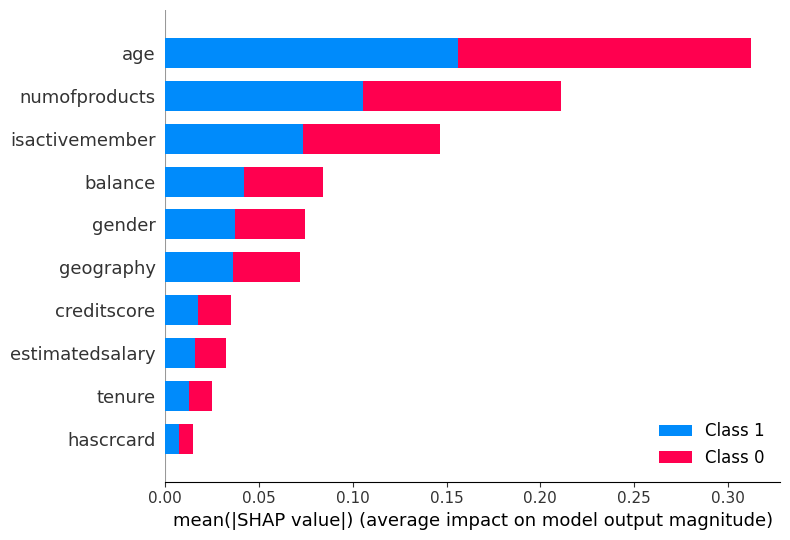

In [44]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=x.columns,max_display=30)

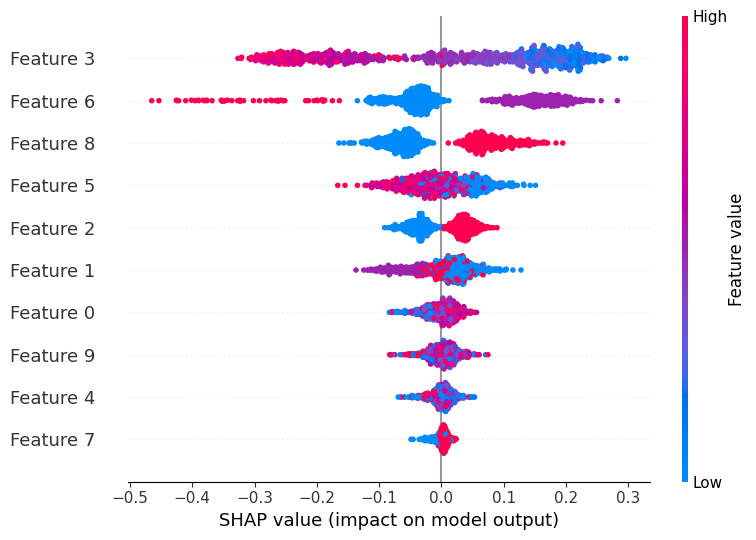

In [45]:
shap.summary_plot(shap_values[0], X_test_scaled)

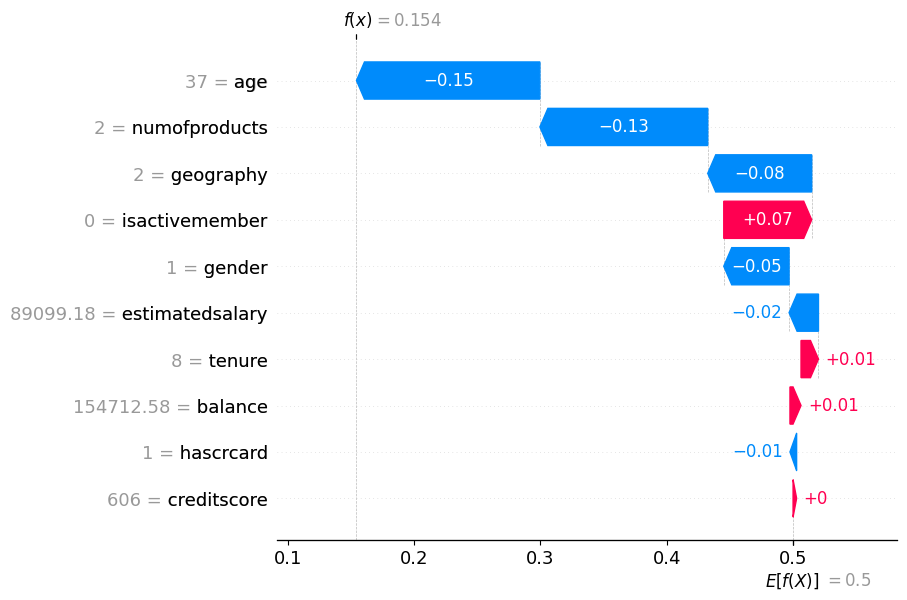

In [46]:
model=xgboost.XGBRegressor().fit(x,y)
explainer_XGB=shap.Explainer(model)
shap_values=explainer_XGB(x)
shap.plots.waterfall(shap_values[0])

The plot starts with the base value (E[f(X)]) which is the average model output over the training dataset the model was trained on. It shows the contribution of each feature to a specific prediction made by a XGBoost model.In the provided plot, the prediction starts at a base value of 0.5, and each feature's value is listed on the left, with its corresponding SHAP value shown as a bar. The length and direction of each bar represent the magnitude and direction of that feature's impact on the model's output. Features that push the prediction higher (towards the positive class) are shown in red, and those that push it lower (towards the negative class) are shown in blue.

Age has the largest negative impact on the model's output, reducing the prediction by approximately 0.15.

Similar to age, NumOfProducts also has a substantial negative impact, decreasing the prediction by roughly 0.13.

The final value f(x) is 0.154 after considering the impact of all the features and is interpreted as a low likelihood of a customer churning.

# Evaluation

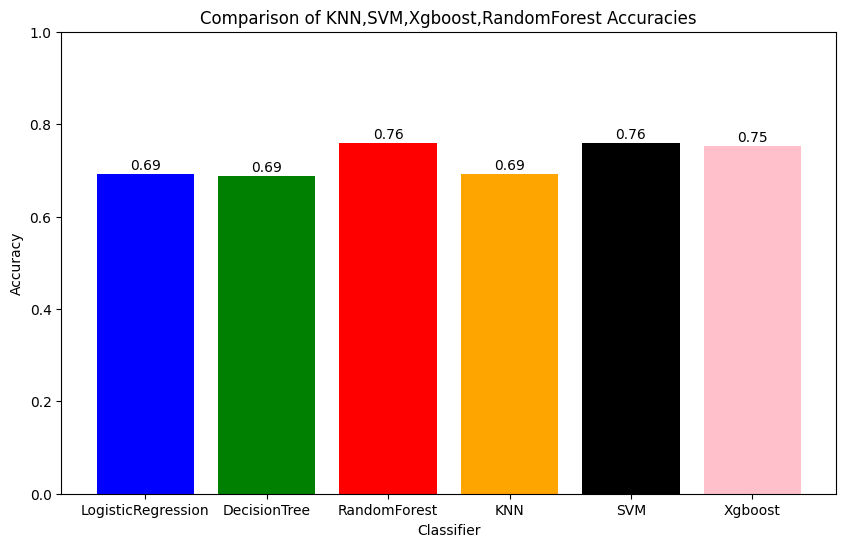

In [47]:
classifiers = ['LogisticRegression','DecisionTree','RandomForest','KNN', 'SVM', 'Xgboost']
accuracies =[0.692,0.6871,0.7583,0.692,0.7583,0.7521]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'orange','black','pink'])
plt.title('Comparison of KNN,SVM,Xgboost,RandomForest Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.show()